In [1]:
## 해시 테이블(Hash Table) 또는 해시 맵(Hash Map)은 키를 값에 매핑할 수 있는 구조인,
## 연관 배열(Associative array) 추상 자료형을 구현하는 자료구조다.

## 연관 배열은 자료구조의 하나로 키 하나와 값 하나가 연관되어 있으며 키를 통해 연관되는 값을 얻을 수 있다.

## 해시 테이블의 가장 큰 특징은 대부분의 연산이 분할 상환 분석(Amortized Analysis)에 따른 시간 복잡도가 O(1)이라는 점이다.
## 덕분에 데이터의 양에 관계없이 빠른 성능을 기대할 수 있다는 장점이 있다.

# 해시

In [2]:
## 해시 함수란 '임의 크기 데이터'를 '고정 크기 값'으로 매핑하는 데 사용할 수 있는 함수를 말한다.
## 해시 테이블의 핵심은 해시 함수다. 

## ABC -> A1
## 1324BC -> CB
## AF32B -> D5

## 여기서 임의 크기의 입력값을 고정 크기 값으로 매핑하는데, 화살표의 역할이 바로 해시 함수다.

## 해시 테이블을 인덱싱하기 위해 이처럼 해시 함수를 사용하는 것을 해싱(Hashing)이라 하며, 
## 해싱은 정보를 가능한 한 빠르게 저장하고 검색하기 위해 사용하는 중요한 기법 중 하나다.
## 해싱은 최적의 검색이 필요한 분야에 사용된다.

## 성능 좋은 해시 함수들의 특징은 다음과 같다

    ## 해시 함수 값 충돌 최소화
    ## 쉽고 빠른 연산
    ## 해시 테이블 전체에 해시 값이 균일하게 분포
    ## 사용할 키의 모든 정보를 이용하여 해싱
    ## 해시 테이블 사용 효율이 높을 것

#### 생일 문제

In [3]:
## 그렇다면 충돌은 얼마나 많이 발생할까? 생각보다 충돌은 쉽게 일어난다.
## 흔한 예로 생일 문제(Birthday Problem)를 들 수 있다.
## 생일의 가짓수는 365개 이므로 여러 사람이 모였을 때 생일이 같은 2명이 존재할 확률을 얼핏 생각해보면
## 비둘기집의 원리(Pigeonhole Principle)에 따라 366명 이상이 모여야 일어나는 일 같다.
## 하지만 실제로는 23명만 모여도 50%를 넘고, 57명이 모이면 그때부터는 99%를 넘어선다.

## 이 결과는 우리의 일반적인 상식에 반하는 내용이라 믿기지 않을 수도 있겠다.
## 그렇다면 실험을 통해 확인해보자. 수식으로 증명하려면 상당히 어려운 계산이 필요하다.
## 하지만 파이썬을 이용하면 간단한 실험을 통해서 어렵지 않게 증명할 수 있다.

## 이러한 컴퓨터 실험을 통한 증명 방법은 1976년 '4색 정리'가 첫 번째 증명으로 가장 유명하다.

## *** 4색 정리 : 지도에서 인접한 나라끼리 서로 다른 색을 칠하려면 4가지 색이면 충분하다는 정리

In [4]:
import random

TRIALS = 100000   ## 10만 번 실험
same_birthdays = 0  ## 생일이 같은 실험의 수

## 10만 번 실험 진행
for _ in range(TRIALS):
    birthdays = []
    ## 23명이 모였을 때, 생일이 같은 2명이 나온 경우 same_birthdays += 1
    for i in range(23):
        birthday = random.randint(1, 365)
        if birthday in birthdays:
            same_birthdays += 1
            break
        birthdays.append(birthday)
        
## 전체 10만 번 실험 중 생일이 같은 2명이 나온 실험의 확률
print(f'{same_birthdays / TRIALS * 100}%')

50.949%


In [5]:
## 여기서는 23이 모이는 경우를 각각 10만 번 실험했다. 
## 그 결과 생일이 같은 2명이 나올 확률이 50%가 나왔다. 
## 이처럼 일반적인 상식과는 달리, 충돌은 생각보다 쉽게 일어나므로 충돌을 최소화하는 일은 무엇보다 중요하다.

#### 비둘기집 원리

In [6]:
## 비둘기집 원리란, n개 아이템을 m개 컨테이너에 넣을 때, n > m 이라면 적어도 하나의 컨테이너에는
## 반드시 2개 이상의 아이템이 들어 있다는 원리를 말한다.

In [7]:
## 왜 충돌은 일어날 수밖에 없을까? 비둘기집 원리는 충돌의 원리를 잘 설명한다.
## 비둘기집 원리에 따라 9개의 공간이 있는 곳에 10개의 아이템이 들어온다면 반드시 1번 이상은
## 충돌이 일어난다. 좋은 해시 함수라면 충돌을 최소화하여 단 1번의 충돌만 일어나게 하겠지만
## 그렇지 않은 해시 함수의 경우 심하면 9번 모두 충돌해서 10개의 공간 중 1개밖에 사용하지 못할 수도 있다.
## 여러 번 충돌한다는 것은 그만큼 추가 연산을 필요로 하기 때문에 가급적 충돌은 최소화하는 것이 좋다.

#### 로드 팩터

In [8]:
## 로트 팩터(Load Factor)란 해시 테이블에 저장된 데이터의 개수 n을 버킷의 개수 K로 나눈 것이다.

In [9]:
## loadfactor = n/k

## 로트 팩터의 비율에 따라서 해시 함수를 재작성해야 될지 또는 
## 해시 테이블의 크기를 조정해야 할지를 결정한다.

## 또한 이 값은 해시 함수가 키들을 잘 분산해 주는지를 말하는 효율성 측정에도 사용된다.
## 일반적으로 로드 팩터가 증가할수록 해시 테이블의 성능은 점점 감소하게 되며
## 자바 10의 경우 0.75를 넘어설 경우 동적 배열처럼 해시 테이블의 공간을 재할당한다.

#### 해시 함수

In [10]:
## 이처럼 해시 테이블을 인덱싱하기 위해 해시 함수를 사용하는 것을 해싱(Hashing)이라고 한다.
## 해싱에는 다양한 알고리즘이 있으며, 최상의 분포를 제공하는 방법은 데이터에 따라 제각각이다.
## 해싱 알고리즘을 일일이 열거하는 것은 이 책의 범위를 벗어나므로, 여기서는 가장 단순하면서도 널리 쓰이는
## 정수형 해싱 기법인 '모듈로 연산을 이용한 나눗셈 방식(Modulo-Division Method)' 하나만 살펴본다.

In [11]:
## 수식은 다음과 같다.
## h(x) = x mod m

## h(x)는 입력값 x의 해시 함수를 통해 생성된 결과다. 
## m은 해시 테이블의 크기로, 일반적으로 2의 멱수에 가깝지 않은 소수를 택하는 것이 좋다.

## h(x)는 이 값의 모듈로 연산의 결과로, 매우 단순한 방법이지만 실무에서는 이미 많은 키 세트가 충분히 랜덤한 상태고,
## 키 세트가 어떤 큰 소수에 의해 순환 구조가 될 확률은 낮기 때문에 실제로는 잘 동작한다. 
## x는 어떤 간단한 규칙을 통해 만들어낸 충분히 랜덤한 상태의 키 값이다.

In [12]:
## 이처럼 해시 함수는 매우 중요한 역할을 하는데, 몇 년 전 구글은 해시 함수를 딥러닝으로 학습한 모델을 적용해
## 충돌을 최소화하는 논문을 발표하며, 해시 테이블 자료구조의 미래를 기대케 하기도 했다.

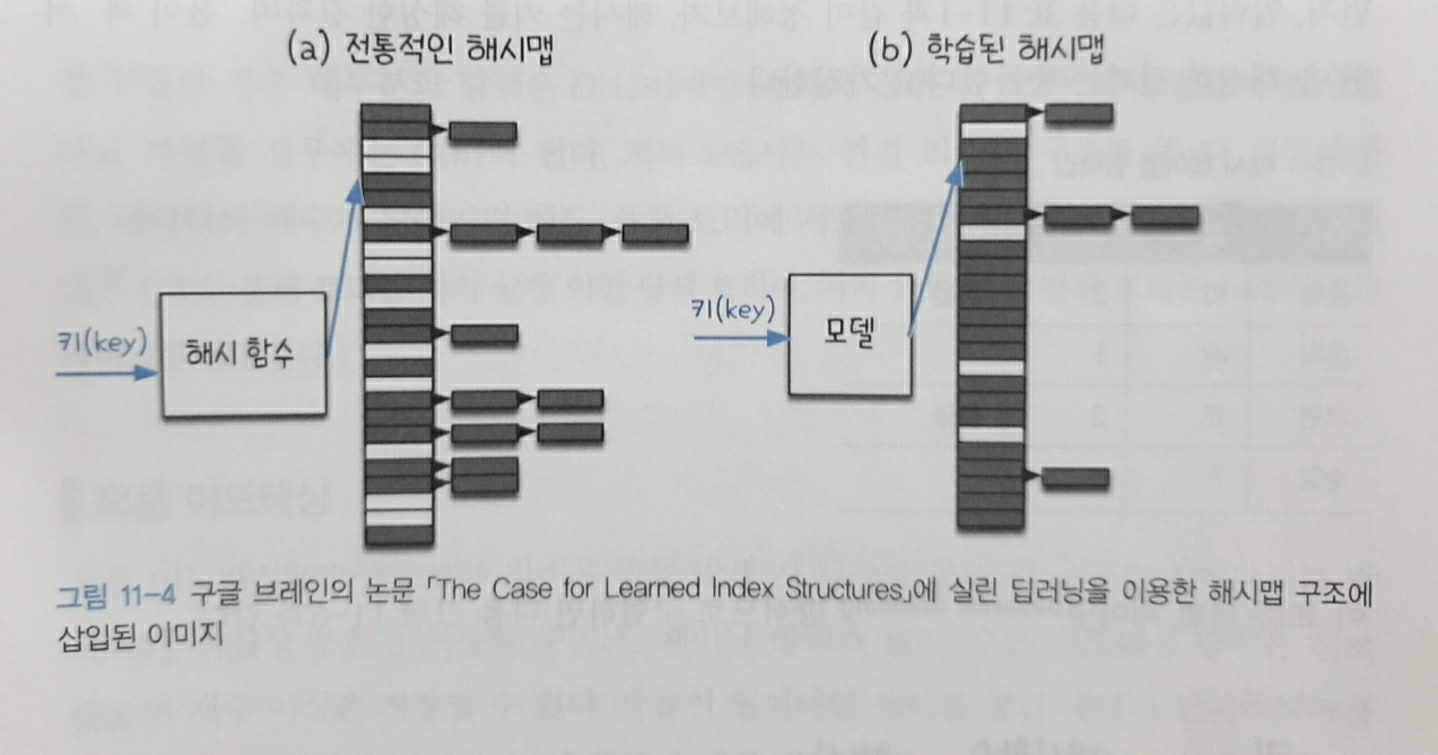

In [13]:
from IPython.display import Image

Image('그림11-4.jpg', width = 500, height = 400)

# 충돌

In [14]:
## 아무리 좋은 해시 함수라도 충돌(Collision)은 발생하게 된다.
## 충돌이 발생하는 경우 어떤 식으로 처리하게 되는지 살펴보자

#### 개별 체이닝

In [15]:
## 먼저, 입력값은 다음 표와 같이 정해보자. 해시는 키를 해싱한 결과며, '윤아'와 '서현'을 해싱한 결과는 충돌한다고 가정한다.

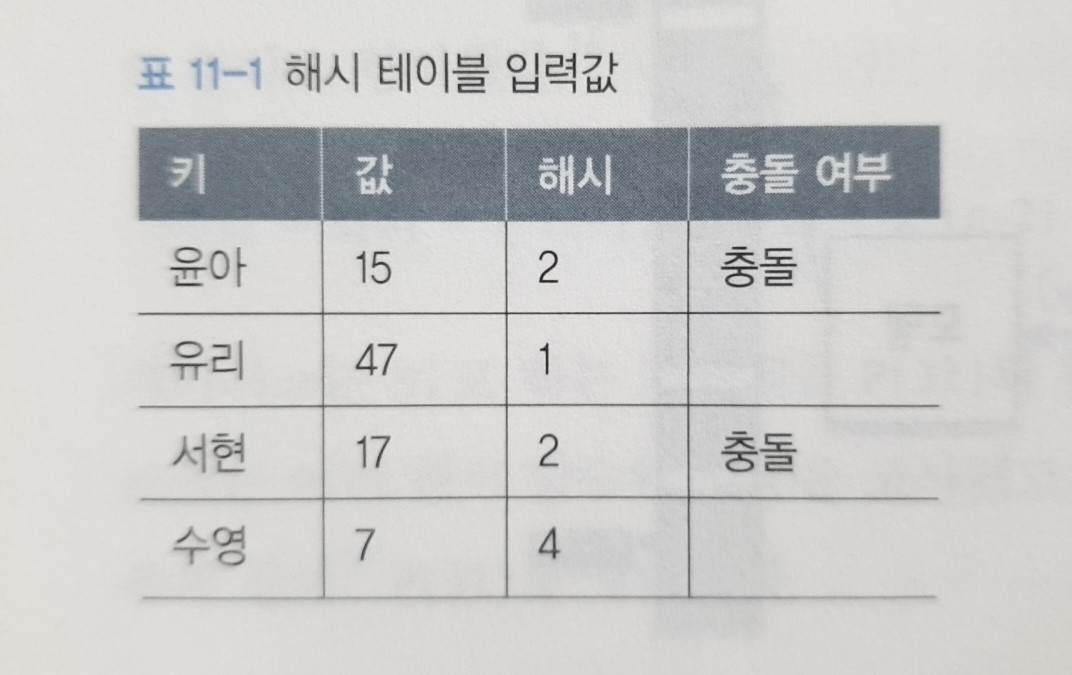

In [16]:
from IPython.display import Image

Image('표11-1.jpg', width = 500, height = 400)

In [17]:
## 이 표를 개별 체이닝(Separate Chaining) 방식으로 구현하면 다음 그림 11-6과 같다.

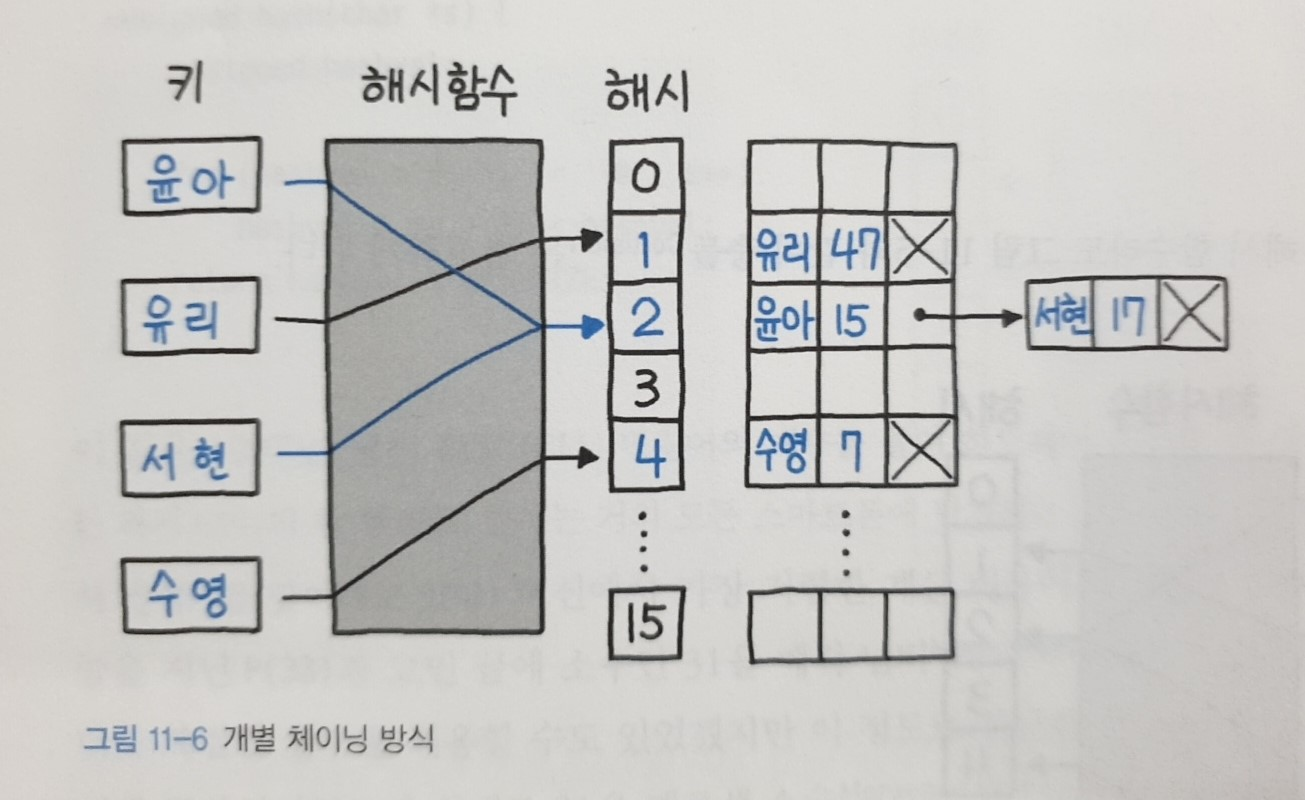

In [18]:
from IPython.display import Image

Image('그림11-6.jpg', width = 500, height = 400)

In [19]:
## 해시 테이블의 기본 방식이기도 한 개별 체이닝은 충돌 발생 시 이 그림과 같이 연결 리스트로 연결하는 방식이다.
## 이처럼 개별 체이닝 방식은 기본적인 자료구조와 임의로 정한 간단한 알고리즘만 있으면 되므로 인기가 높다.
## 원래 해시 테이블 구조의 원형이기도 하며, 가장 전통적인 방식으로, 흔히 해시 테이블이라고 하면 바로 이 방식을 말한다.

## 간단히 원리를 요약하면 다음과 같다.
    ## 1. 키의 해시 값을 계산한다.
    ## 2. 해시 값을 이용해 배열의 인덱스를 구한다.
    ## 3. 같은 인덱스가 있다면 연결 리스트로 연결한다.
    
## 잘 구현한 경우 대부분의 탐색은 O(1)이지만 최악의 경우, 
## 즉 모든 해시 충돌이 발생했다고 가정할 경우에는 O(n)이 된다.

## 자바 8에서는 연결 리스트 구조를 좀 더 최적화해서, 데이터의 개수가 많아지면 Red-Black tree에 저장하는 형태로 사용하기도 했다.

#### 오픈 어드레싱

In [20]:
## 오픈 어드레싱(Open Addressing) 방식은 충돌 발생 시 탐사를 통해 빈 공간을 찾아나서는 방식이다.
## 사실상 무한정 저장할 수 있는 체이닝 방식과 달리, 오픈 어드레싱 방식은 전체 슬롯의 개수 이상은 저장할 수 없다.
## 충돌이 일어나면 테이블 공간 내에서 탐사(Probing)를 통해 빈 공간을 찾아 해결하며, 
## 이 때문에 개별 체이닝 방식과 달리, 모든 원소가 반드시 자신의 해시값과 일치하는 주소에 저장된다는 보장은 없다.

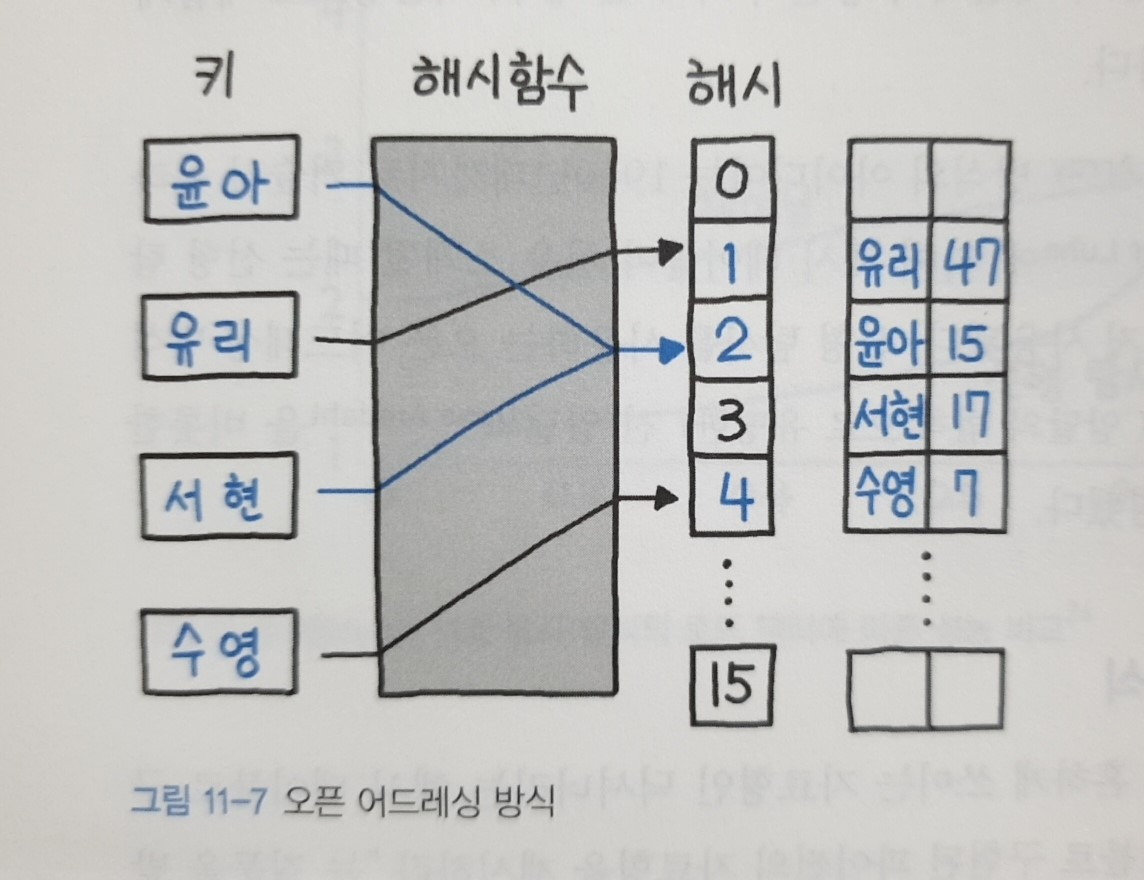

In [21]:
from IPython.display import Image

Image('그림11-7.jpg', width = 500, height = 400)

In [22]:
## 여러 가지 오픈 어드레싱 방식 중에서 가장 간단한 방식인 선형 탐사(Linear Probing) 방식은 충돌이 발생할 경우
## 해당 위치부터 순차적으로 탐사를 하나씩 진행한다.
## 이렇게 탐사를 진행하다가 비어 있는 공간을 발견하면 삽입하게 된다.
## 가장 가까운 다음 빈 위치를 탐사해 새 키를 삽입한다.

In [23]:
## 선형 탐사의 한 가지 문제점은 해시 테이블에 저장되는 데이터들이 고르게 분포되지 않고 뭉치는 경향이 있다는 점이다.
## 해시 테이블 여기저기에 연속된 데이터 그룹이 생기는 현상을 클러스터링(Clustering)이라 하는데,
## 클러스터들이 점점 커지게 되면 인근 클러스터들과 서로 합쳐지는 일이 발생한다.

## 이렇게 되면 해시 테이블의 특정 위치에는 데이터가 몰리게 되고, 다른 위치에는 상대적으로 데이터가 거의 없는 상태가 될 수 있다.
## 이러한 클러스터링 현상은 탐사 시간을 오래 걸리게 하며, 전체적으로 해싱 효율을 떨어뜨린다.

In [24]:
## 오픈 어드레싱 방식은 버킷 사이즈보다 큰 경우에는 삽입할 수 없다. 따라서 일정 이상 채워지면,
## 즉 기준이 되는 로드 팩터 비율을 넘어서게 되면, 그로스 팩터(Growth Factor)의 비율에 따라 
## 더 큰 크기의 또 다른 버킷을 생성한 후 여기에 새롭게 복사하는 리해싱(Rehashing) 작업이 일어난다.
## 이는 동적 배열에서 공간이 가득 찰 경우, 더블링으로 새롭게 복사해서 옮겨가는 과정과 유사하다.

#### 언어별 해시 테이블 구현 방식

In [25]:
## 리스트와 함께 파이썬에서 가장 흔하게 쓰이는 자료형인 딕셔너리는 해시 테이블로 구현되어 있다.
## 면접 시 "해시 테이블로 구현된 파이썬의 자료형을 제시하라"는 질문을 받는다면 주저 없이 딕셔너리라고 답할 수 있어야 한다.

## 그렇다면 파이썬의 해시 테이블은 충돌 시 어떤 방식을 사용할까?
## 정답부터 말하자면 '오픈 어드레싱' 방식으로 구현되어 있다.

## CPython 구현에는 다음과 같은 주석이 적혀있다.
    ## 체이닝 시 malloc으로 메모리를 할당하는 오버헤드가 높아 오픈 어드레싱을 택했다.
    
## 또한, "Beautiful Code" 책 18장, '파이썬의 사전 구현: 모든 이를 위한 범용 자료구조 만들기'에서 
## 파이썬이 체이닝을 사용하지 않는 이유를 설명한 바 있는데, 연결 리스트를 만들기 위해서는 추가 메모리 할당이 필요하고
## 추가 메모리 할당은 상대적으로 느린 작업이기 때문에 택하지 않았다고 기술했다.

In [26]:
## 파이썬의 해시 테이블이 개별 체이닝 방식이 아니라는 점은 사실 면접관조차 잘 모를 수 있다.
## 원래 해시 테이블은 해싱과 체이닝의 결합으로 탄생했고, 교과서에는 개별 체이닝 방식만 설명하는 경우가 일반적이기 때문이다.

## 그렇다면 왜 오픈 어드레싱일까?

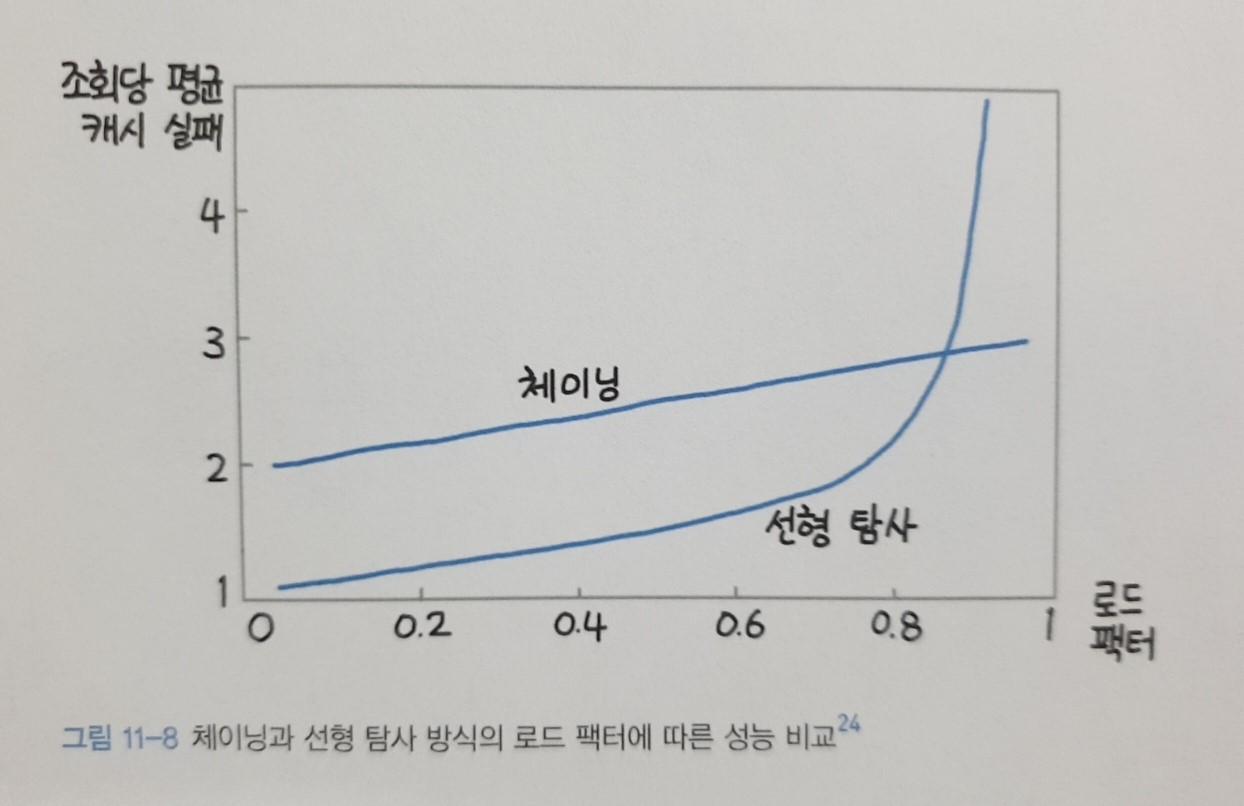

In [27]:
from IPython.display import Image

Image('그림11-8.jpg', width = 500, height = 400)

In [28]:
## 그림 11-8에서 오픈 어드레싱의 한 방식인 선형 탐사 방식은 일반적으로 체이닝에 비해 성능이 더 좋다.
## 그러나 슬롯의 80% 이상이 차게 되면 급격한 성능 저하가 일어나며, 체이닝과 달리 전체 슬롯의 전체 개수 이상,
## 즉 로드 팩터 1 이상은 저장할 수 없다.

## 따라서 최근의 루비나 파이썬같은 모던(Modern) 언어들은 오픈 어드레싱 방식을 택해 성능을 높이는 대신,
## 로드 팩터를 작게 잡아 성능 저하 문제를 해결한다.

# 28. 해시맵 디자인

### LeetCode 706. Design HashMap

##### 다음 기능을 제공하는 해시맵을 디자인하라.

- put(key, value) : 키, 값을 해시맵에 삽입한다. 만약 이미 존재하는 키라면 업데이트한다.
<br/>

- get(key) : 키에 해당하는 값을 조회한다. 만약 키가 존재하지 않는다면 -1을 리턴한다.
<br/>

- remove(key) : 키에 해당하는 키, 값을 해시맵에서 삭제한다.

##### 풀이 1 개별 체이닝 방식을 이용한 해시 테이블 구현

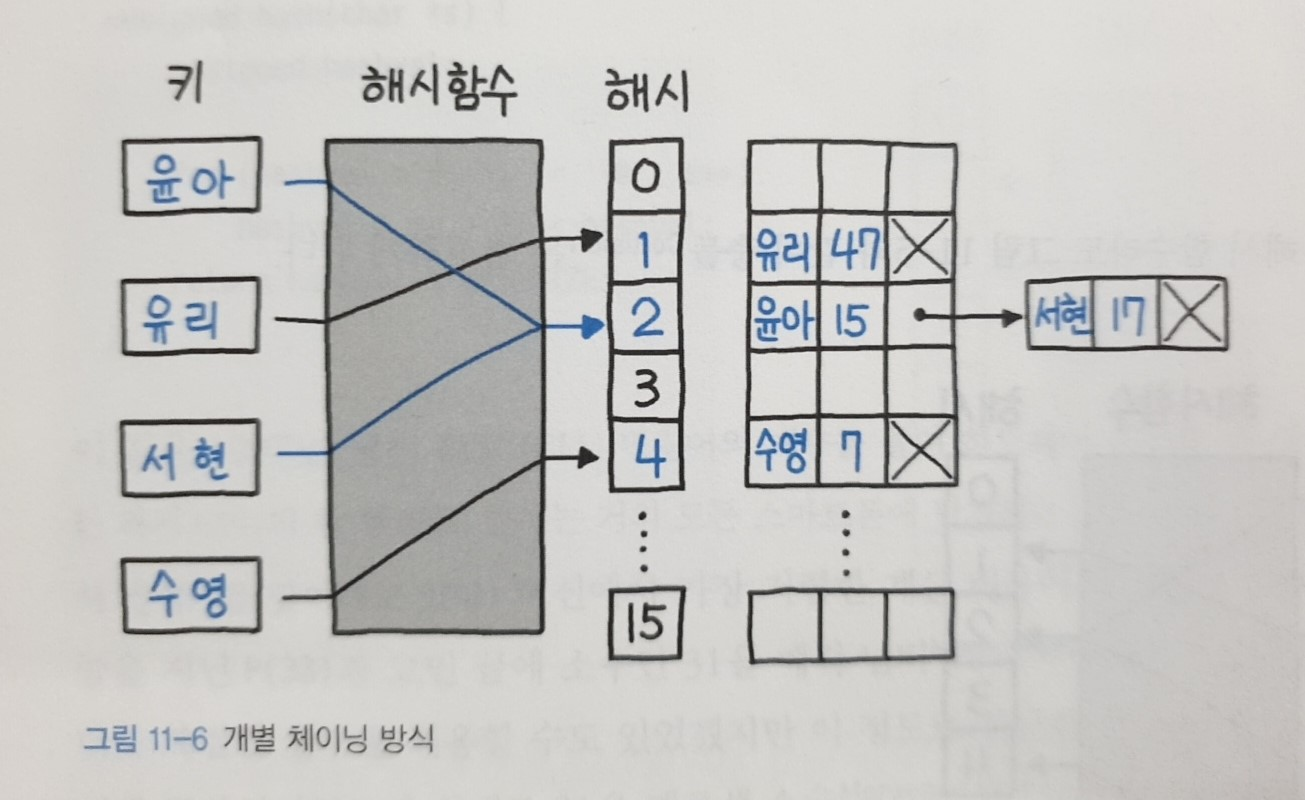

In [29]:
from IPython.display import Image

Image('그림11-6.jpg', width = 300, height = 300)

In [30]:
## 앞서 파이썬의 딕셔너리는 오픈 어드레싱을 사용한다고 했지만, 여기서는 그림 11-6에서 살펴본
## 개별 체이닝 방식으로 구현해본다.
## 그림 11-6의 구조를 직접 한 번 구현해보자.

In [31]:
## 구현할 MyHashMap 클래스의 전체 메소드는 다음과 같다.

class MyHashMap:
    def __init(self):
        pass
    
    def put(self, key: int, value: int) -> None:
        pass
    
    def get(self, key: int) -> int:
        pass
    
    def remove(self, key: int) -> None:
        pass
    
## 여기서는 초기화, 삽입, 조회, 삭제의 총 4가지 기능이 있으며, 편의상 키와 값은 모두 int로 한다.
## 이외에도 키, 값을 보관하고 연결 리스트로 처리할 별도의 객체를 구현해야 하는데, 여기서는 다음과 같이 
## ListNode라는 이름의 클래스를 정의한다.

class ListNode:
    def __init__(self, key=None, value=None):
        self.key = key
        self.value = value
        self.next = None

In [32]:
## 전체 코드
import collections

class MyHashMap:
    # 초기화
    # 기본 사이즈는 1000개 정도로 적당히 설정하고, 각 ListNode를 담게 될 기본 자료형을 선언
    # 편리하게 구현하기 위해 존재하지 않는 키를 조회할 경우 자동으로 디폴트를 생성해주는 defaultdict를 사용
    def __init__(self):
        self.size = 1000
        self.table = collections.defaultdict(ListNode)
    
    # 삽입
    # 이 문제는 편의상 모든 키를 정수형으로 지정했다. 따라서 size의 개수만큼 모듈로 연산을 한 나머지를
    # 해시값으로 정하는 매우 단순한 형태로 처리한다.
    def put(self, key: int, value: int) -> None:
        index = key % self.size
        # 인덱스에 노드가 없다면 삽입 후 종료
        # 해싱한 결과인 index는 해시 테이블의 인덱스가 될 것이다.
        if self.table[index].value is None:
            self.table[index] = ListNode(key, value)
            return 
        # self.table[index] is None으로 비교하지 않고 굳이 value의 존재 유무를 비교했는데, 
        # 이는 defaultdict가 존재하지 않는 인덱스로 조회를 할 경우 에러를 발생하지 않고 바로 디폴트 객체를 생성하기 때문이다.
        
        # 인덱스에 노드가 존재하는 경우 연결리스트 처리
        # 여기서부터는 해시 충돌이 발생한 경우인데, 개별 체이닝 방식으로 해결한다.
        # p는 인덱스의 첫 번째 값이며 여기서부터 p.next를 계속 탐색한다.
        p = self.table[index]
        while p:
            # 만일 이미 존재하는 키라면 업데이트한다.
            if p.key == key:
                p.value = value
                return
            # p의 다음 ListNode가 None이라면 아무것도 하지 않고 빠져나간다
            # 이 break 구문을 처리하지 않으면, p가 None이 되어 p.next = ListNode(key, value)에서 에러가 발생할 것이다.
            if p.next is None:
                break
            p = p.next
        p.next = ListNode(key, value)
        
        # 조회
        def get(self, key: int) -> int:
            index = key % self.size
            # 노드가 존재하지 않을 때
            if self.table[index].value is None:
                return -1
            
            # 노드가 존재할 때 일치하는 키 탐색
            p = self.table[index]
            while p:
                if p.key == key:
                    return p.value
                p = p.next
            return -1
        
        # 삭제
        # 인덱스를 구한 다음 아무것도 없다면, 잘못된 키를 삭제 시도한 경우이므로 그냥 리턴한다.
        # 값이 있을 때는 2가지 케이스로 나눠서 처리한다.
        def remove(self, key: int) -> None:
            index = key % self.size
            if self.table[index].value is None:
                return
            
            # 인덱스의 첫 번째 노드일 때 삭제 처리
            p = self.table[index]
            if p.key == key:
                # 인덱스의 첫 번째 노드일 때, p.next is None 이라면 유일한 노드를 삭제하는 경우이므로
                # 원래는 모두 없애야 하지만 여기서는 ListNode()로 빈 노드를 할당하게 했다.
                # self.table[index] = None을 할당하면 앞서 추가, 조회함수에서 self.table[index].value is None에서 
                # 에러가 발생할 것이다.
                self.table[index] = ListNode() if p.next is None else p.next
                # 첫 번째 노드 삭제시 유일한 노드가 아닐 경우 p.next로 다음 노드를 첫 번째 노드로 지정해주면 끝
                return 
            
            # 연결 리스트 노드 삭제
            prev = p
            while p:
                if p.key == key:
                    prev.next = p.next
                    return
                prev, p = p, p.next
                
            # 만약 루프에 들어서자마자 일치하는 키를 발견하게 되면, prev.next = p.next가 동일한 부분이 될 것이다.
            # 그러나 이런 경우는 발생하지 않는다. 왜냐하면 처음부터 일치하는 경우는 이미 위에서 처리가 되기 때문이다.
            # 따라서 여기서는 반드시 한 번 이상 반복한 후에야 일치하는 경우가 생길 것이다.

# 29. 보석과 돌

### LeetCode 771.Jewels and Stones

##### J는 보석이며, S는 갖고 있는 돌이다. S에는 보석이 몇 개나 있을까? 대소문자는 구분한다.

In [33]:
## 예제1
    ## input: J = "aA", S = "aAAbbbb"
    ## output: 3

##### 풀이 1 해시 테이블을 이용한 풀이

In [34]:
## 이 문제는 갖고 있는 돌 S의 각각의 개수를 모두 헤아린 다음,
## J의 각 요소를 키로 하는 각 개수를 합산하면 풀이할 수 있다.
## 따라서 해시 테이블로 풀이할 수 있는 전형적인 문제다.

In [35]:
def numJewelsInStones(J: str, S: str) -> int:
    freqs = {}
    count = 0
    
    # 돌의 빈도 수 계산
    for char in S:
        if char not in freqs:
            freqs[char] = 1
        else:
            freqs[char] += 1
            
    # 보석의 빈도 수 합산
    for char in J:
        if char in freqs:
            count += freqs[char]
            
    return count

In [36]:
J = 'aA'
S = 'aAAbbbb'

numJewelsInStones(J, S)

3

##### 풀이 2 defaultdict 를 이용한 비교 생략

In [37]:
## 이전 문제들에서 defaultdict를 사용해 존재하지 않는 키에 대해 디폴트를 리턴해주는 풀이를 가끔씩 사용한 바 있다.
## 여기서도 defaultdict를 사용하면 코드 줄 수를 훨씬 더 줄일 수 있다.

In [38]:
def numJewelsInStones(J: str, S: str) -> int:
    freqs = collections.defaultdict(int)
    count = 0
    
    # 비교 없이 돌 빈도 수 계산
    for char in S:
        freqs[char] += 1
    
    # 비교 없이 보석 빈도 수 계산
    for char in J:
        count += freqs[char]
        
    return count

In [39]:
## 키가 존재하는지 여부를 매번 판별할 필요가 없기 때문에 이처럼 바로 계산할 수 있고,
## 코드 수도 많이 줄어 깔끔해졌다.

##### 풀이 3 Counter로 계산 생략

In [40]:
## Counter를 사용하면 코드를 더욱 짧게 줄일 수 있다. 
## 각 개수를 계산하는 부분까지 자동으로 처리할 수 있기 때문이다.

In [41]:
def numJewelsInStones(J: str, S: str) -> int:
    freqs = collections.Counter(S) # 돌 빈도 수 계산
    count = 0
    
    # 비교 없이 보석 빈도 수 합산
    for char in J:
        count += freqs[char]
        
    return count

In [42]:
J = 'aA'
S = 'aAAbbbb'

numJewelsInStones(J, S)

3

In [43]:
## Counter는 존재하지 않는 키의 경우 KeyError를 발생하는 게 아니라 0을 출력해주기 때문에
## defaultdict와 마찬가지로 에러에 대한 예외 처리를 할 필요가 없다.
## 단순히 J에 포함된 문자의 개수를 계산하기만 하면 된다.

##### 풀이 4 파이썬다운 방식

In [44]:
## 해시 테이블과는 관련이 없지만, 이 문제는 Pythonic Way 로 단 한줄로 계산할 수 있다.

In [45]:
def numJewelsInStones(J: str, S: str) -> int:
    return sum(s in J for s in S)

In [46]:
## 이 코드가 어떻게 동작하는지 잘 이해되지 않는다면 리스트 컴프리헨션을 출력해보면
## 좀 더 직관적으로 이해할 수 있다.

In [47]:
J = 'aA'
S = 'aAAbbbb'

[s for s in S]

['a', 'A', 'A', 'b', 'b', 'b', 'b']

In [48]:
## 이렇게 하면 각 문자를 하나씩 출력하는 리스트 컴프리헨션이다.

In [49]:
[s in J for s in S]

[True, True, True, False, False, False, False]

In [50]:
## 여기서 약간의 비교 구문을 추가해 S의 문자 s가 J에 포함되어 있는지 여부를 출력할 수 있다.
## 이제 이 값을 sum()으로 합산한다.

In [51]:
sum([s in J for s in S])

3

In [52]:
## 결과는 true의 개수로 3이 된다. 

# 30. 중복 문자 없는 가장 긴 부분 문자열

### LeetCode 3. Longest Substring Without Repeating Characters

##### 중복 문자가 없는 가장 긴 부분 문자열(substring)의 길이를 리턴한다.

In [53]:
## 예제1
    ## input: "abcabcbb"
    ## output: 3
    
## 예제2
    ## input: "bbbbb"
    ## output: 1
    
## 예제3
    ## input: "pwwkew"
    ## output: 3

##### 풀이 1 슬라이딩 윈도우와 투 포인터로 사이즈 조절

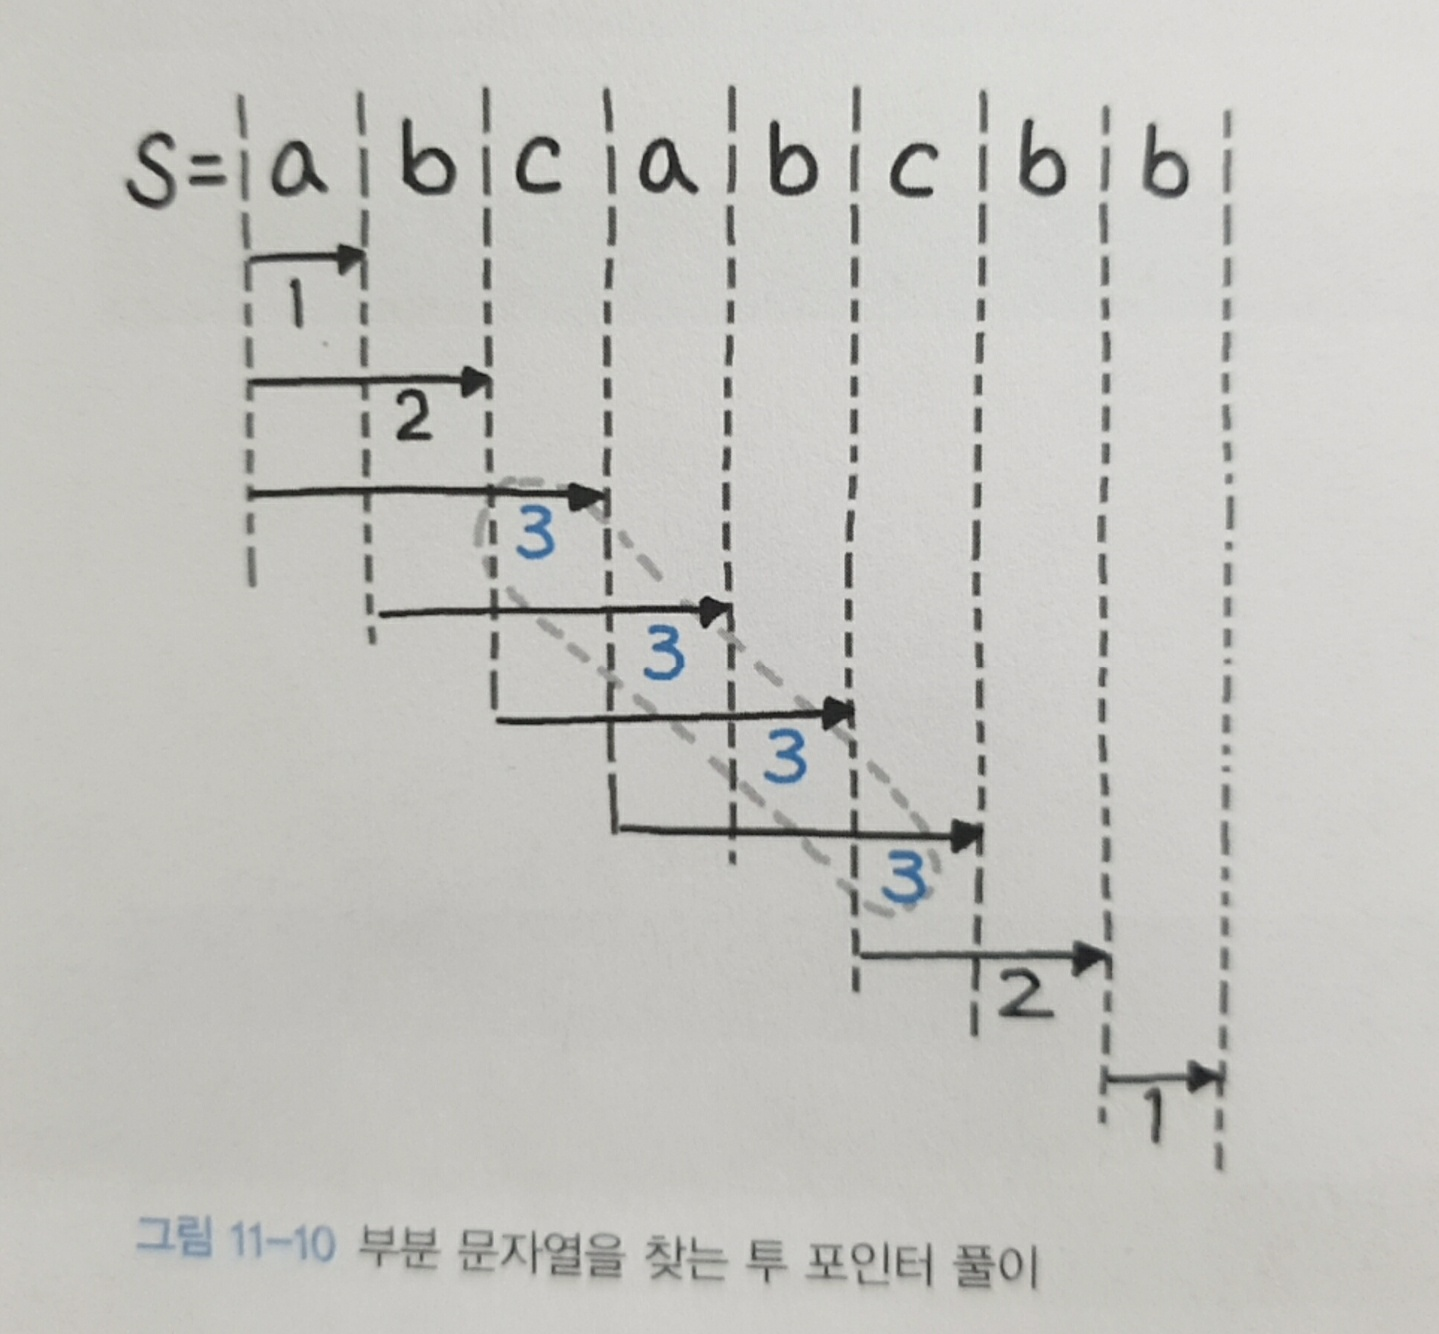

In [54]:
from IPython.display import Image

Image("그림11-10.jpg", width="300", height="200")

In [55]:
## 슬라이딩 윈도우로 한 칸씩 우측으로 이동하면서 윈도우 내에 모든 문자가 중복이 없도록
## 투 포인터로 윈도우 사이즈를 조절하면서 풀이해보면 그림 11-10과 같다.

In [56]:
## 정답을 찾는 과정을 코드로 한번 구현해보자
## 먼저, 투 포인터로 문제를 풀이하되, 포인터 2개 모두 왼쪽에서 출발한다.
## 각각 왼쪽 시작점에서 출발해 두 번째 포인터(index 변수)는 계속 오른쪽으로 확장한다.

In [57]:
def lengthOfLongestSubstring(s: str) -> int:
    used = {}
    max_length = start = 0
    
    for index, char in enumerate(s):
        # 이미 등장했던 문자라면 'start' 위치 갱신
        # 그러나 이미 등장했다고 무작정 옮겨 버리면 곤란하다.
        # 현재 슬라이딩 윈도우의 바깥에 있는 문자는 예전에 등장한 적이 있더라도 지금은 무시해야 하기 때문이다.
        # 따라서 비교 구문에 조건 start <= used[char]를 추가한다.
        # 이렇게 하면 슬라이딩 윈도우 안쪽에 있는 중복 문자에 대해서만 True 처리가 될 것이다.
        if char in used and start <= used[char]:
            start = used[char] + 1
        # 처음 보는 문자인 경우, 매번 max()로 부분 문자열의 길이를 확인하면서 더 큰 값인 경우 갱신한다.
        else: 
            max_length = max(max_length, index - start + 1)
        
        # 현재 문자의 위치 삽입
        used[char] = index
    return max_length

In [58]:
s = "abcabcbb"

lengthOfLongestSubstring(s)

3

# 31. 상위 K빈도 요소

### Leetcode 347. Top K Frequent Elements

##### K번 이상 등장하는 요소를 추출하라.

In [59]:
## 예제1
    ## input: nums = [1, 1, 1, 2, 2, 3], k = 2
    ## output: [1, 2]

##### 풀이 1 Counter를 이용한 음수 순 추출

In [60]:
## 요소의 값을 키로 하는 해시 테이블을 만들고 여기에 빈도 수를 저장한 다음, 우선순위 큐를 이용해
## k번만큼 추출하면, k번 이상 등장하는 요소를 손쉽게 추출할 수 있다.

In [63]:
from typing import *
import heapq

def topKFrequent(nums: List[int], k: int) -> List[int]:
    # 빈도 수는 Counter를 이용해 쉽게 구할 수 있다.
    freqs = collections.Counter(nums)
    freqs_heap = []
    
    # 힙에 음수로 삽입
    # 삽입 방식은 2가지가 있는데, 첫째는 일반적인 파이썬의 리스트에 모두 삽입한 다음 
    # 마지막에 heapify()를 하는 방식과 두 번째는 매번 heappush()를 하는 방식이다.
    # heappush()로 삽입하게 되면 매번 heapify()가 일어나기 때문에 별도로 처리할 필요가 없다.
    
    for f in freqs:
        heapq.heappush(freqs_heap, (-freqs[f], f))
        
    # 여기서는 키/값을 바꿔서 힙에 추가했다.
    # 힙은 키 순서대로 정렬되기 때문에 이를 위해 빈도 수를 키로 한 것이다.
    # 또한 값을 음수로 저장했다. 파이썬 heap은 Min-Heap만 지원하기 때문이다.
    
    topk = list()
    # k번 만큼 추출, 최소 힙(Min Heap)이므로 가장 작은 음수 순으로 추출
    
    for _ in range(k):
        topk.append(heapq.heappop(freqs_heap)[1])
        
    return topk

In [64]:
nums = [1, 1, 1, 2, 2, 3]

topKFrequent(nums, 2)

[1, 2]

##### 풀이 2 파이썬다운 방식

In [65]:
## K 빈도 이상의 요소를 추출하기 위해 힙에 넣고 빼는 작업들을 진행했다. 
## 이 작업을 자동으로 할 수는 없을까?

## Counter에는 most_common()이라는 빈도 수가 높은 순서대로 아이템을 추출하는 기능을 제공한다.

In [66]:
k = 2
collections.Counter(nums).most_common(k)

[(1, 3), (2, 2)]

In [67]:
## 이제 여기서 정답인 1과 2를 추출하기만 하면 된다. 
## 여기서는 파이썬의 2가지 기능인 zip()과 * 를 더 활용해본다.

In [68]:
list(zip(*collections.Counter(nums).most_common(k)))[0]

(1, 2)

In [69]:
## 여기서는 튜플이 나왔지만 리스트와 마찬가지로 모두 정답으로 처리된다.
## 전체 코드는 다음과 같이 한 줄로 처리할 수 있다.

def topKFrequent(nums, k):
    return list(zip(*collections.Counter(nums).most_common(k)))[0]

In [70]:
## **** 문법 ****

    ## zip() 함수
        
        ## zip() 함수는 2개 이상의 시퀀스를 짧은 길이를 기준으로 일대일 대응하는 새로운 튜플 시퀀스를 만든다.
        ## >>> a = [1, 2, 3, 4, 5]
        ## >>> b = [2, 3, 4, 5]
        ## >>> c = [3, 4, 5]
        ## >>> zip(a, b)
        ## <zip object at 0x105b6d9b0>
        
        ## 파이썬 2에서는 zip()의 결과가 바로 리스트가 된다. 하지만 파이썬 3+에서는 제너레이터를 리턴한다.
        ## 제너레이터에서 실제값을 추출하기 위해서는 다음과 같이 list()로 한 번 더 묶어주면 된다.
        
        ## >>> list(zip(a, b))
        ## >>> [(1, 2), (2, 3), (3, 4), (4, 5)]
        ## >>> list(zip(a, b, c))
        ## >>> [(1, 2, 3), (2, 3, 4), (3, 4, 5)]
        
        ## 아울러 zip()의 결과 자체는 리스트 시퀀스가 아닌 튜플 시퀀스를 만들기 때문에, 값을 변경하는 게 불가능하다.
        ## 불변 객체(Immutable)다.
        
        ## >>> d = list(zip(a, b, c))
        ## >>> d[0]
        ## (1, 2, 3)
        ## >>> d[0][0]
        ## 1
        ## >>> d[0][0] = 0
        ## TypeError: 'tuple' object does not support item assignment
        
        ## 튜플은 불변 객체이기 때문에 TypeError가 발생했다.
        

In [74]:
## **** 문법 ****

    ## Aterisk(*)
        
        ## zip()의 파라미터는 1개가 될 수도 있고, 10개가 될 수도 있다.
        
        ## >>> a = ['a1', 'a2']
        ## >>> b = ['b1', 'b2']
        ## >>> c = ['c1', 'c2']
        ## >>> d = ['d1', 'd2']
        ## >>> list(zip(a, b, c, d))
        ## [('a1', 'b1', 'c1', 'd1'), ('a2', 'b2', 'c2', 'd2')]
        
        ## >>> list(zip(a))
        ## [('a1',), ('a2',)]
        ## >>> list(zip(a, b))
        ## [('a1', 'b1'), ('a2', 'b2')]
        ## >>> list(zip(a, b, c))
        ## [('a1', 'b1', 'c1'), ('a2', 'b2', 'c2')]
        
        ## 파이썬에서 *는 언팩(Unpack)이다. 
        ## 시퀀스 언패킹 연산자(Sequence Unpacking Operator)로 말 그대로 시퀀스를 풀어 헤치는 연산자를 뜻하며,
        ## 주로 튜플이나 리스트를 언패킹하는 데 사용한다.
        
        ## 앞서 31번 문제의 풀이 2에서와 같이 언패킹을 했을 때와 하지 않았을 때를 비교하면 용도를 분명히 알 수 있다.
        ## >>> collections.Counter(nums).most_common(k)
        ## [(1, 3), (2, 2)]
        
        ## 언패킹을 했을 때
        ## >>> list(zip(*collections.Counter(nums).most_common(k)))
        ## [(1, 2), (3, 2)]
        ## 언패킹을 하지 않았을 때
        ## >>> list(zip(collections.Counter(nums).most_common(k)))
        ## [((1, 3),), ((2, 2),)]
        
        ## 입력값이 [1, 1, 1, 2, 2, 3]일 때, collections.Counter(nums).most_common(k)의 결과가 
        ## [(1, 3), (2, 2)]임은 이미 살펴본 바 있다. 그러나 이 값을 그대로 zip()으로 묶어버리면
        ## 튜플이 풀어지지 않고 그대로 하나의 값처럼 묶여버린다.
        ## 이런 경우 *로 언패킹을 해줘야 튜플의 값을 풀어 헤칠 수 있다.
        ## 언패킹한 값만 별도로 출력할 수 없기 때문에 디버깅이 어렵지만, 아마 내부적으로는 튜플이 제거되고
        ## [[1, 3], [2, 2]]와 같은 형태로 모두 리스트로 풀어질 것이다.
        
        ## 간단한 예제를 하나 더 살펴보자
        
        ## >>> fruits = ['lemon', 'pear', 'watermelon', 'tomato']
        ## >>> fruits
        ## ['lemon', 'pear', 'watermelon', 'tomato']
        
        ## >>> print(fruits[0], fruits[1], fruits[2], fruits[3])
        ## lemon pear watermelon tomato
        
        ## >>> for f in fruits:
        ##         print(f, end=' ')
        ## lemon pear watermelon tomato
        
        ## *로 언패킹 해주면 다음과 같이 매우 간편하게 출력할 수 있다.
        ## >>> print(*fruits)
        ## lemon pear watermelon tomato
        
        ## 이외에도 *는 활용도가 많다. 언패킹뿐만 아니라 함수의 파라미터가 되었을 때는 반대로 패킹(Packing)도 가능하다.
        ## >>> def f(*params):
        ##         print(params)
        ## >>> f('a', 'b', 'c')
        ## ('a', 'b', 'c')
        
        ## 이처럼 하나의 파라미터를 받는 함수에 3개의 파라미터를 전달했지만, params 변수 하나로 패킹되어 처리된다.
        ## 이는 파이썬 3+에서 print()함수의 기본 동작 원리이기도 하다.
        ## >>> print('a', 'b', 'c')
        ## a b c
        
        ## 변수의 할당 또한 *로 묶어서 처리할 수 있다.
        ## >>> a, *b = [1, 2, 3, 4]
        ## >>> a
        ## 1
        ## >>> [2, 3, 4]
        ## >>> *a, b = [1, 2, 3, 4]
        ## >>> a
        ## [1, 2, 3]
        ## >>> b
        ## 4
        
        ## 일반적인 변수는 값을 하나만 취하지만 *로 처리하게 되면 나머지 모든 값을 취하게 된다.
        
        ## 이외에도 활용 방법은 상당히 많다.
        ## 마지막으로 하나가 아닌 개를 쓰는 경우도 있다.
        ## **인데 마찬가지로 C의 더블 포인터와 동일하게 생겼지만, 전혀 다른 동작을 수행한다.
        ## 파이썬에서 * 1개는 튜플 또는 리스트 등의 시퀀스를 언패킹하고, ** 2개는 다음과 같이 키/값 페어를 언패킹하는 데 사용한다.
        
        ## >>> date_info = {'year':'2020', 'month':'01', 'day':'7'}
        ## >>> new_info = {**date_info, 'day':'14'}
        ## {'year':'2020', 'month':'01', 'day':'14'}
        
        ## 이처럼 **date_info에 모든 요소를 언패킹할 수 있으며, 여기서는 'day';'14'의 새로운 값으로 업데이트를 시도했다.